In [ ]:
import gzip
import numpy as np

In [ ]:
import os

In [ ]:
os.chdir("/content/drive/Shareddrives/Study/SEM 2/SC-602 Numerical Methods for Data Science/Project/Data/Zip")

In [ ]:
import gzip
f = gzip.open('train-images-idx3-ubyte.gz','r')

image_size = 28
num_images = 60000

import numpy as np
f.read(16)
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_images, image_size, image_size, 1)

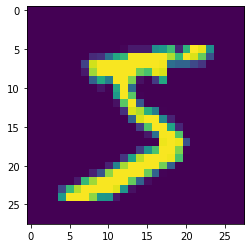

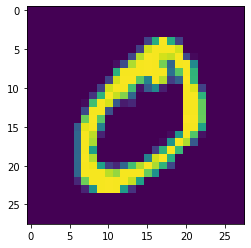

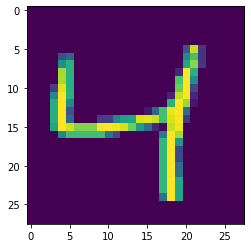

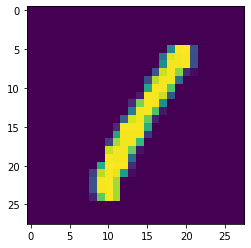

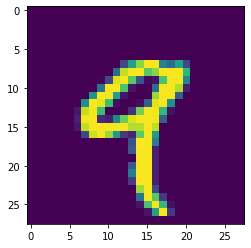

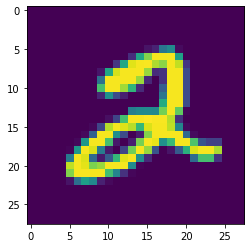

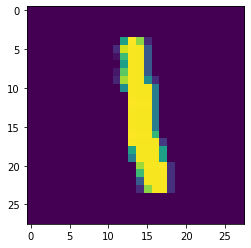

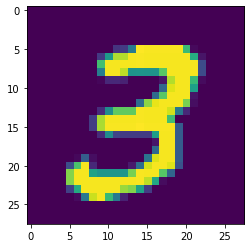

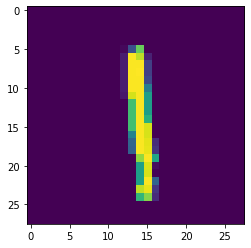

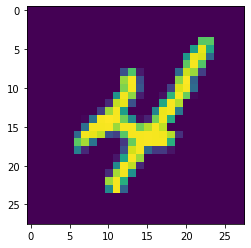

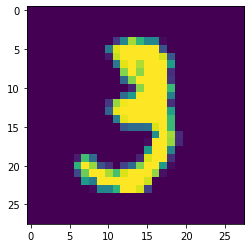

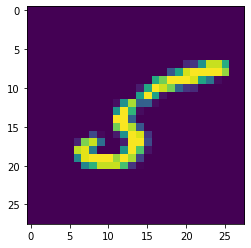

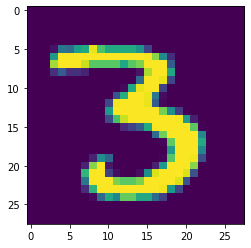

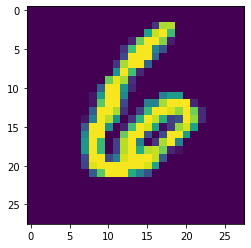

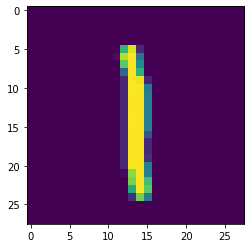

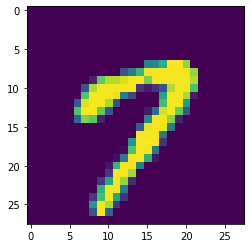

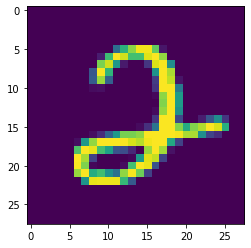

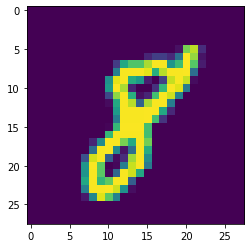

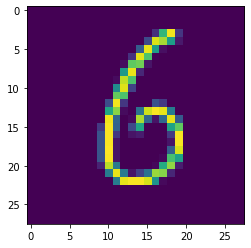

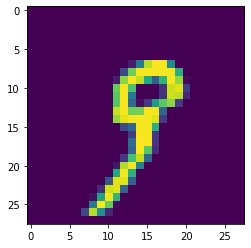

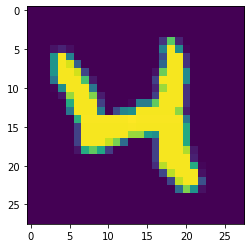

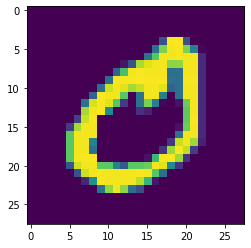

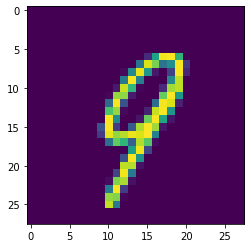

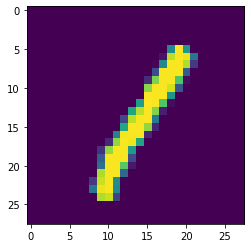

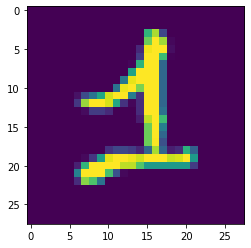

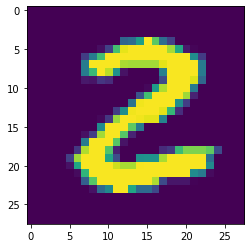

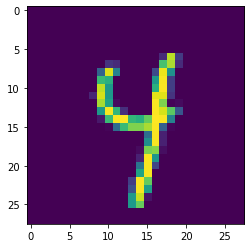

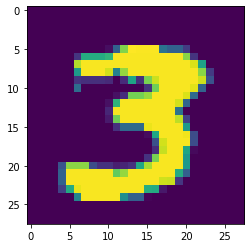

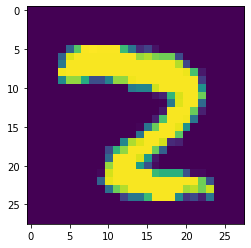

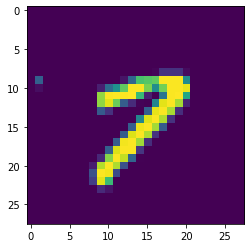

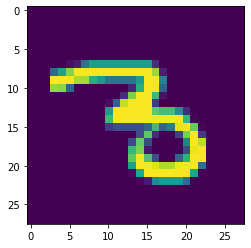

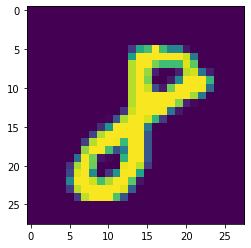

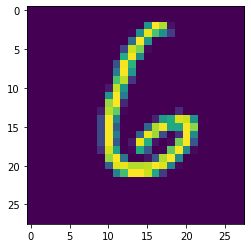

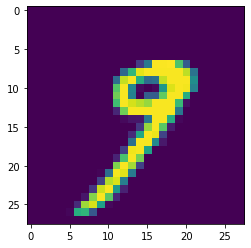

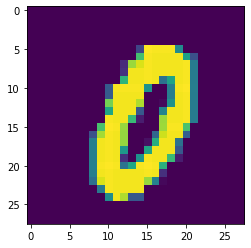

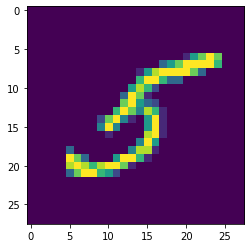

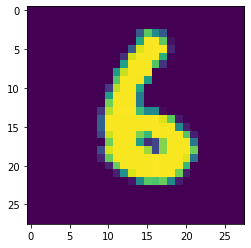

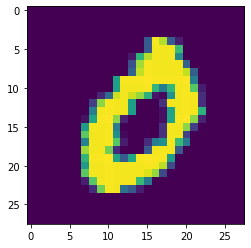

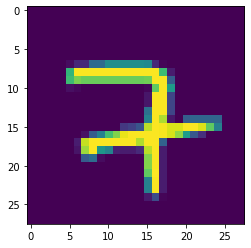

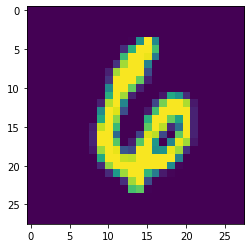

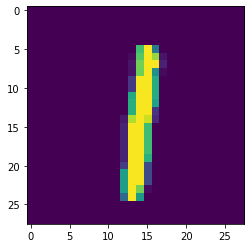

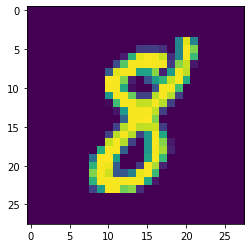

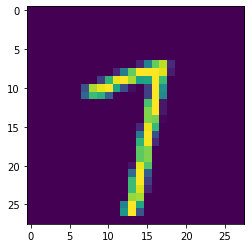

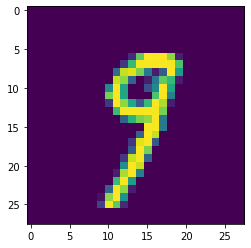

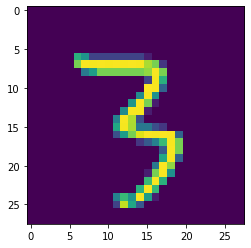

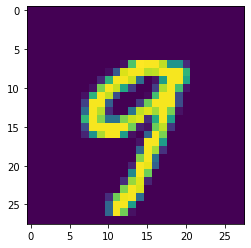

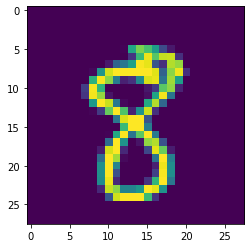

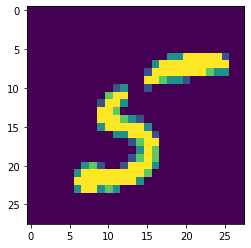

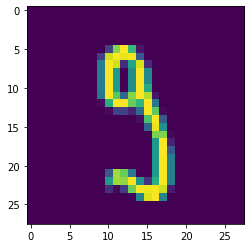

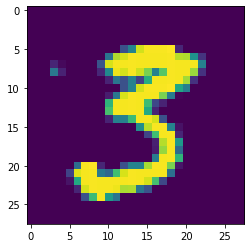

In [ ]:
import matplotlib.pyplot as plt
for i in range(50):
  image = np.asarray(data[i]).squeeze()
  plt.imshow(image)
  plt.show()
  print()

In [ ]:
image = np.asarray(data)

In [ ]:
f1 = gzip.open('train-labels-idx1-ubyte.gz','r')
f1.read(8)
labels=np.array([])
for i in range(0,60000):   
  buf = f1.read(1)
  labels = np.append(labels,np.frombuffer(buf, dtype=np.uint8).astype(np.int64))
labels=labels.reshape(60000,1)
labels[0:4]

array([[5.],
       [0.],
       [4.],
       [1.]])

In [ ]:
image_r=image.reshape(60000,784,1)

In [ ]:
  for i in range(10):
        globals()["D" + str(i)] = np.array([])

In [ ]:
#pickle
for i in range(60000):
  for j in range(10):
    if labels[i][0]==j:
      globals()["D" + str(j)]=np.append(globals()["D" + str(j)],image_r[i])

In [ ]:
for i in range(10):
        globals()["s" + str(i)] = int(globals()["D" + str(i)].shape[0]/784)

In [ ]:
for i in range(10):
        globals()["D" + str(i)] = globals()["D" + str(i)].reshape(784,globals()["s" + str(i)])
        globals()["r" + str(i)]=np.linalg.matrix_rank(globals()["D" + str(i)])
        globals()["n" + str(i)]=min(globals()["D" + str(i)].shape)
        print(globals()["D" + str(i)].shape)
print(D0)

(784, 5923)
(784, 6742)
(784, 5958)
(784, 6131)
(784, 5842)
(784, 5421)
(784, 5918)
(784, 6265)
(784, 5851)
(784, 5949)
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [119. 224. 253. ...   0.   0.   0.]
 [  0.   0.   0. ... 253. 253. 253.]
 [102.  12.   0. ...   0.   0.   0.]]


In [ ]:
for i in range(10):
  globals()["u" + str(i)], globals()["s" + str(i)],globals()["vt" + str(i)]=np.linalg.svd(globals()["D" + str(i)],full_matrices=False)
  globals()["s" + str(i)]=np.diag(globals()["s" + str(i)])
  globals()["s" + str(i)]=np.array(globals()["s" + str(i)])

In [ ]:
# pickle
temp=np.zeros(700).reshape(10,70)
for i in range(10):
  for r in range(70):
    globals()["lst" + str(i)]=[]
    x = globals()["u" + str(i)][:,:r] @ globals()["s" + str(i)][0:r,:r] @ globals()["vt" + str(i)][:r,:]
    nrm=np.linalg.norm(globals()["D" + str(i)]-x)
    sig=s0[r+1][r+1]
    y=abs(nrm-sig)
    temp[i][r]=y

In [ ]:
import pickle
pickling_on = open("temp.pickle","wb")
pickle.dump(temp, pickling_on)
pickling_on.close()

In [ ]:
import pickle
pickling_on = open("model_C.pickle","rb")
temp = pickle.load(pickling_on)
pickling_on.close()

In [ ]:
kv=np.zeros(10)
for i in range(10):
  for j in  range(70):
    globals()["lst" + str(i)].append(temp[i][j])
    kv[i]=globals()["lst" + str(i)].index(min(globals()["lst" + str(i)]))
kv=np.array([662.,   0., 161., 409., 781., 782., 782., 782., 458., 782.])

In [ ]:
kv=kv.astype(int)
for i in range(10):
  globals()["utu" + str(i)]= globals()["u" + str(i)][:,:kv[i]].T @ globals()["u" + str(i)][:,:kv[i]]
  print(np.round(globals()["utu" + str(i)],4))
  globals()["uut" + str(i)]=globals()["u" + str(i)][:,:kv[i]] @ globals()["u" + str(i)][:,:kv[i]].T

[[ 1.  0.  0. ...  0.  0. -0.]
 [ 0.  1.  0. ...  0. -0.  0.]
 [ 0.  0.  1. ...  0.  0. -0.]
 ...
 [ 0.  0.  0. ...  1.  0. -0.]
 [ 0. -0.  0. ...  0.  1. -0.]
 [-0.  0. -0. ... -0. -0.  1.]]
[]
[[ 1.  0.  0. ... -0.  0. -0.]
 [ 0.  1. -0. ...  0.  0.  0.]
 [ 0. -0.  1. ... -0.  0.  0.]
 ...
 [-0.  0. -0. ...  1. -0.  0.]
 [ 0.  0.  0. ... -0.  1. -0.]
 [-0.  0.  0. ...  0. -0.  1.]]
[[ 1. -0. -0. ...  0.  0.  0.]
 [-0.  1.  0. ... -0. -0. -0.]
 [-0.  0.  1. ... -0. -0.  0.]
 ...
 [ 0. -0. -0. ...  1. -0.  0.]
 [ 0. -0. -0. ... -0.  1.  0.]
 [ 0. -0.  0. ...  0.  0.  1.]]
[[ 1. -0. -0. ...  0.  0. -0.]
 [-0.  1. -0. ... -0. -0. -0.]
 [-0. -0.  1. ... -0.  0.  0.]
 ...
 [ 0. -0. -0. ...  1.  0. -0.]
 [ 0. -0.  0. ...  0.  1.  0.]
 [-0. -0.  0. ... -0.  0.  1.]]
[[ 1. -0. -0. ...  0. -0.  0.]
 [-0.  1.  0. ... -0.  0. -0.]
 [-0.  0.  1. ... -0. -0.  0.]
 ...
 [ 0. -0. -0. ...  1.  0.  0.]
 [-0.  0. -0. ...  0.  1. -0.]
 [ 0. -0.  0. ...  0. -0.  1.]]
[[ 1.  0.  0. ... -0.  0.  0.]
 [ 0. 

In [ ]:
ft = gzip.open('t10k-images-idx3-ubyte.gz','r')

import numpy as np
ft.read(16)
buff = ft.read(image_size * image_size * 10000)
d = np.frombuffer(buff, dtype=np.uint8).astype(np.float32)
d = d.reshape(10000, image_size, image_size)

In [ ]:
imaget = np.asarray(d)
image_t=imaget.reshape(10000,784,1)

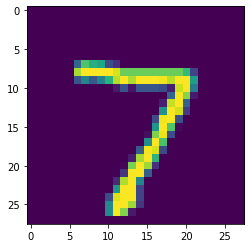

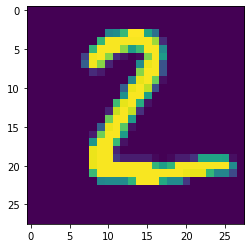

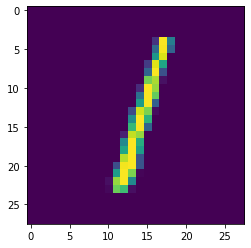

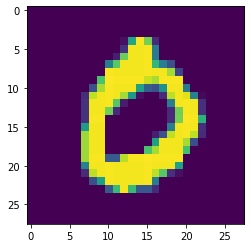

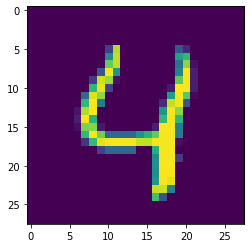

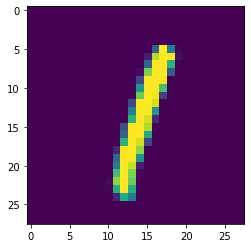

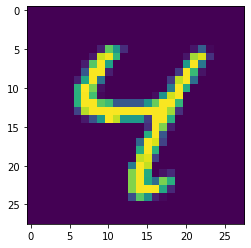

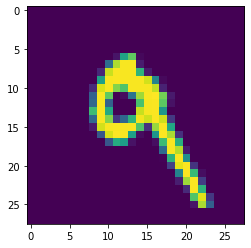

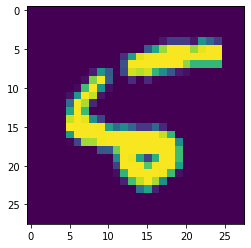

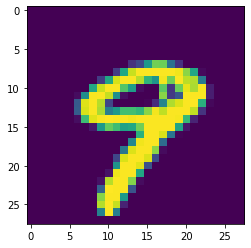

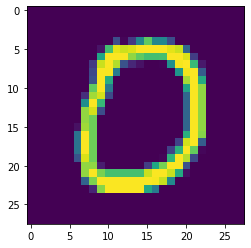

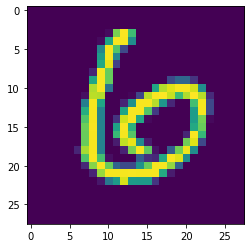

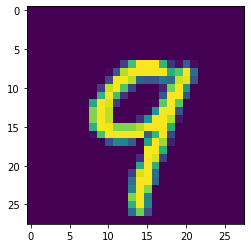

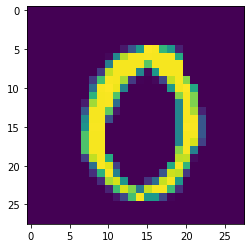

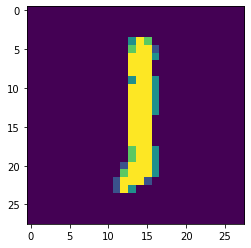

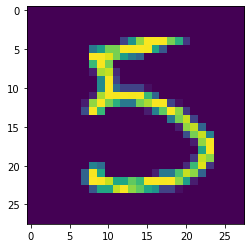

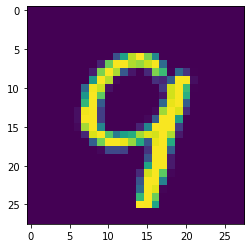

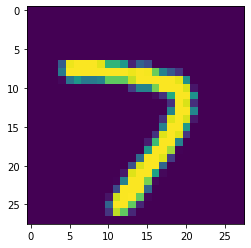

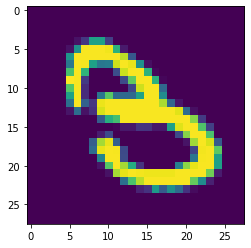

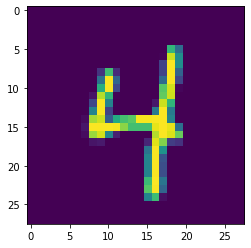

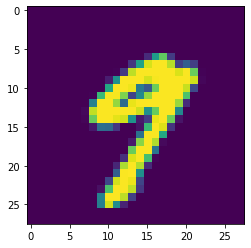

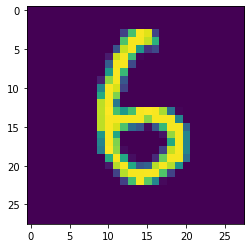

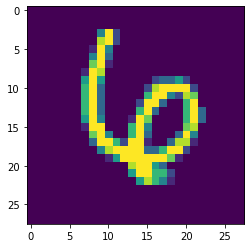

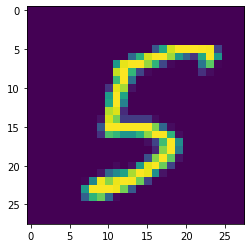

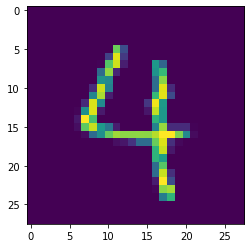

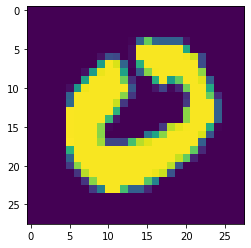

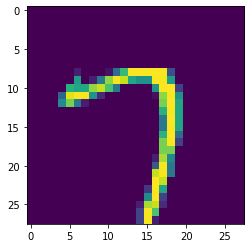

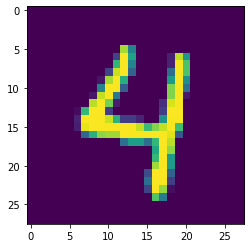

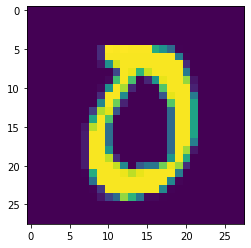

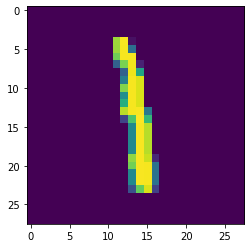

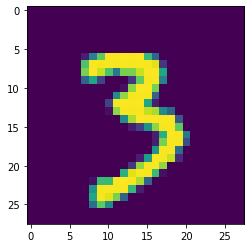

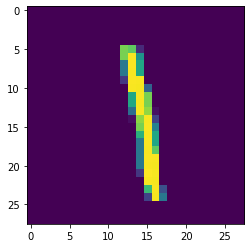

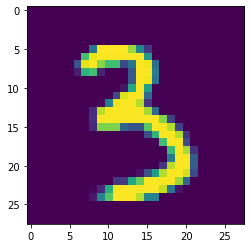

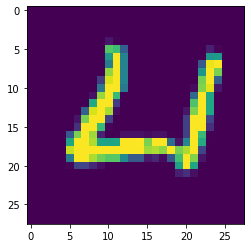

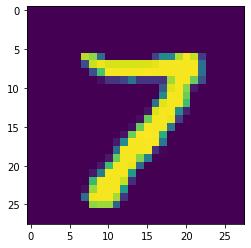

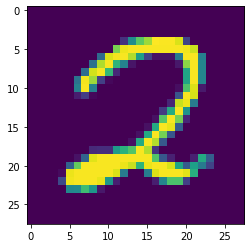

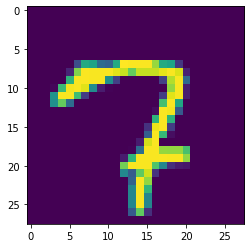

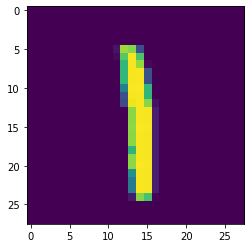

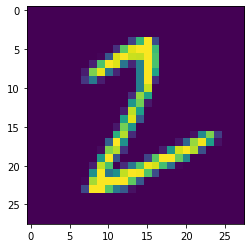

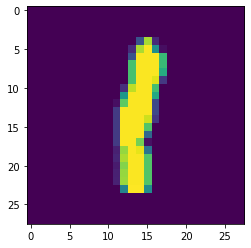

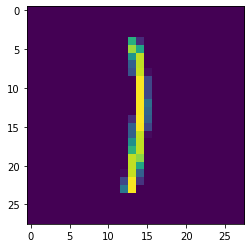

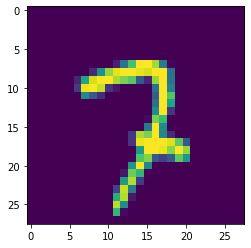

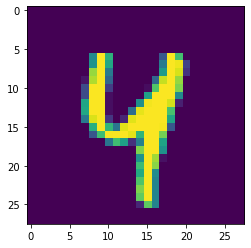

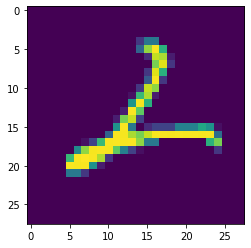

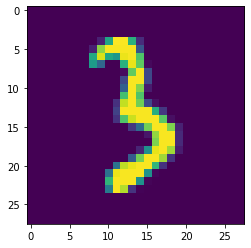

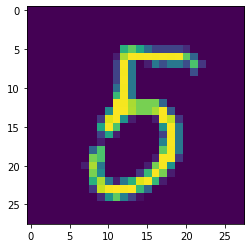

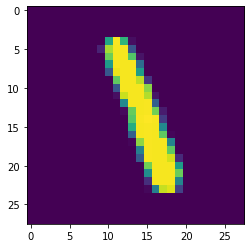

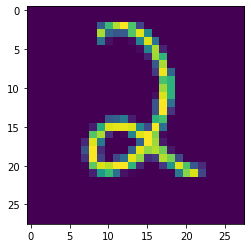

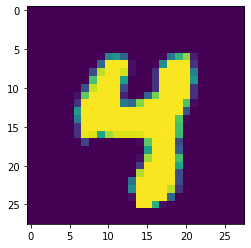

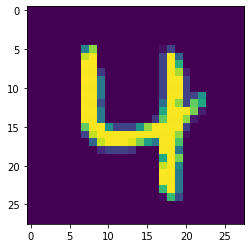

In [ ]:
import matplotlib.pyplot as plt
for i in range(50):
  image = np.asarray(d[i]).squeeze()
  plt.imshow(image)
  plt.show()
  print()

In [ ]:
ft1 = gzip.open('t10k-labels-idx1-ubyte.gz','r')
ft1.read(8)
labels=np.array([])
for i in range(0,10000):   
  buff = ft1.read(1)
  labels = np.append(labels,np.frombuffer(buff, dtype=np.uint8).astype(np.int64))
labels=labels.reshape(10000,1)
print(labels[:10])

[[7.]
 [2.]
 [1.]
 [0.]
 [4.]
 [1.]
 [4.]
 [9.]
 [5.]
 [9.]]


In [ ]:
labels_o=np.zeros(10000)
for j in range(10000):
  q=[]
  for i in range(10):
    globals()["t" + str(i)]=globals()["uut" + str(i)] @ image_t[j]
    root=np.linalg.norm(globals()["t" + str(i)]-image_t[j],2)
    q.append(root**2)
  labels_o[j]=q.index(min(q))

In [ ]:
true=0
for i in range(10000):
  if labels_o[i]==labels[i]:
    true+=1
print(true)
print('Success rate:',true/100,'%')

1073
Success rate: 10.73 %
